In [1]:
import numpy
from matplotlib import pyplot
import sympy
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [2]:
#Problem conditions
L=11
Vmax=136
rhomax=250
nx=51
dt=0.001
dx=(L/(nx-1))
#Initial conditions
x=numpy.linspace(0,L,nx)
rho0=numpy.ones(nx)*20
rho0[10:20]=50


In [3]:
def rho(T):
    
    rho=rho0.copy()
    nt=int(T/dt)
    ones=numpy.ones(nx)
    #computing rho at time T, respecting the boundary condition
    for n in range (nt):
        rhon=rho.copy()
        rho[1:]=rhon[1:]-Vmax*dt/dx*(rhon[1:]-rhon[:-1])
    #computing the speed at time T, in every location    
    one=numpy.ones(nx)
    V=Vmax*(one-rho/rhomax)
    
    #plotting the density and the speed
    pyplot.figure(figsize=(4.0,4.0))
    pyplot.title('Densité et vitesse à T={}minutes'.format(T*60))
    pyplot.xlabel('x')
    pyplot.ylabel('Densité(bleu) vitesse(orange)')
    pyplot.xlim(0.0,L)
    pyplot.ylim(0.0,Vmax)
    pyplot.grid()
    pyplot.plot(x,rho, color='C0', linestyle='--', label='densité')
    pyplot.plot(x, V, color='orange', linestyle='-', label='vitesse')
    pyplot.legend()
    
    #computing the mean speed in a very unefficient way
    somme=0
    for i in range(nx):
        somme=somme+V[i]
    Vmoyen=somme/nx
    
    #printing the value of minimum and mean speed at the given time T
    print('T= {:2.0f} min,vitesse moyenne : {:4.2f} m/s'.format(T*60,Vmoyen/3.6))
    print('T= {:2.0f} min,vitesse minimale: {:4.2f} m/s'.format(T*60,V.min()/3.6))

    

T=  0 min,vitesse moyenne : 33.87 m/s
T=  0 min,vitesse minimale: 30.22 m/s
T=  3 min,vitesse moyenne : 33.98 m/s
T=  3 min,vitesse minimale: 30.89 m/s
T=  6 min,vitesse moyenne : 34.76 m/s
T=  6 min,vitesse minimale: 34.76 m/s


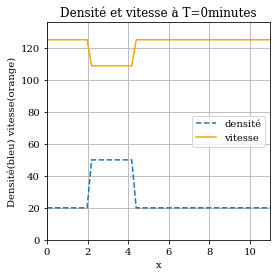

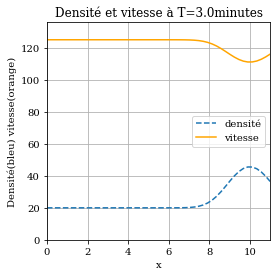

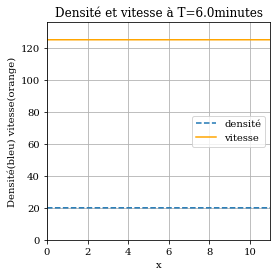

In [4]:
rho(0)
rho(0.05)
rho(0.1)

In [5]:
#Toute cette partie était juste pour m'entrainer à faire une animation, et est encore très brouillon (bien que
#ça fonctionne)


def rho(T):
    rho=rho0.copy()
    one=numpy.ones(nx)
    V0=Vmax*(one-rho/rhomax)
    somme=0
    for i in range(nx):
        somme=somme+V0[i]
    vmoy=[somme/(nx*3.6)]
    v_min=[V0.min()/3.6]
    rho_hist=[rho0.copy()]
    V_hist=[V0.copy()]
    nt=int(T/dt)
    ones=numpy.ones(nx)
    for n in range (nt):
        rhon=rho.copy()
        rho[1:]=rhon[1:]-Vmax*dt/dx*(rhon[1:]-rhon[:-1])
        rho_hist.append(rho.copy())
        V=Vmax*(one-rho/rhomax)
        V_hist.append(V.copy())
        somme=0
        for i in range(nx):
            somme=somme+V[i]
        vmoy.append(somme/(nx*3.6))
        v_min.append(V.min()/3.6)
    return(rho_hist,V_hist,V0,v_min,vmoy)
        #rho[1:]=rhon[1:]-dt/dx*((rhon[1:]-rhon[:-1])*(ones[1:]-(Vmax/rhomax)*(rhon[1:]+rhon[:-1])))
        #print(rho)
        #rho[1:]=rhon[1:]-dt/dx*(rhon[1:]-rhon[1:]*rhon[1:]*Vmax/rhomax-rho[:-1]+rho[:-1]*rho[:-1]*Vmax/rhomax)
rho_hist,V_hist,V0,v_min,vmoy=rho(0.1)    

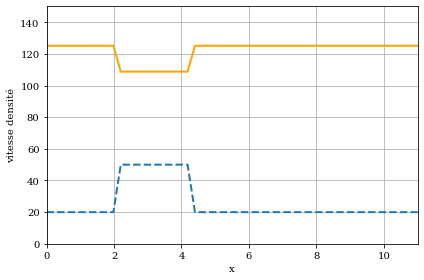

In [6]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('vitesse densité')
pyplot.grid()
line1 = pyplot.plot(x, rho0,
                   color='C0', linestyle='--', linewidth=2)[0]
line2 = pyplot.plot(x, V0,
                   color='orange', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 150)
fig.tight_layout()

In [7]:
def update_plot(n, rho_hist, V_hist,v_min,vmoy):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}, v_min : {:4.2f}, v_moyen : {:4.2f}'.format(n,v_min[n],vmoy[n]))
    line1.set_ydata(rho_hist[n])
    line2.set_ydata(V_hist[n])

In [8]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=100, fargs=(rho_hist,V_hist,v_min,vmoy),
                               interval=100)

In [9]:
# Display the video.
HTML(anim.to_html5_video())